# Credit Card Default Prediction Project

## Overview

This research aimed at the case of customers default payments and compares the predictive accuracy of probability of default. Dataset was constructed by both API calls and kaggle dataset. The research is studied as a classification machine learning problem with a binary variable, default payment as the response variable, and 23 explanatory features as predictor variables.

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import requests
import json
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.options.display.max_columns = 100
import pickle

## Data Understanding

### Data Collection by API
https://www.fraudlabspro.com/developer \
A small amout of data is collected to show how is the API call being used in our research.

In [91]:
from order import Order

f = open('api.json')
api_key = json.load(f)

df_order = pd.DataFrame()

for i in range(5):
    d = { 'key': api_key,
          'ip': '19{}.112.62.101'.format(i)}

    result = json.loads(Order.validate(d))
    df_order = pd.concat([df_order, pd.DataFrame(result, index=[0])])
    time.sleep(0.1)

In [89]:
df_order

,is_country_match,is_high_risk_country,distance_in_km,distance_in_mile,ip_country,ip_continent,ip_region,ip_city,ip_latitude,ip_longitude,...,user_order_memo,fraudlabspro_score,fraudlabspro_distribution,fraudlabspro_status,fraudlabspro_id,fraudlabspro_version,fraudlabspro_error_code,fraudlabspro_message,fraudlabspro_credits,device_id
0,NA,N,-,-,AR,South America,Cordoba,Las Varillas,-31.87208,-62.71946,...,,100,0,APPROVE,20210107-H1WDDP,1.5.1,208,INVALID QUANTITY VALUE,498,NA
0,NA,N,-,-,CL,South America,Region Metropolitana de Santiago,Santiago,-33.42628,-70.56656,...,,100,0,APPROVE,20210107-LFVKXT,1.5.1,208,INVALID QUANTITY VALUE,498,NA
0,NA,N,-,-,US,North America,California,Tustin,33.73617,-117.82073,...,,100,0,APPROVE,20210107-P8FPTC,1.5.1,208,INVALID QUANTITY VALUE,498,NA
0,NA,N,-,-,CN,Asia,Beijing,Beijing,39.9075,116.39723,...,,100,0,APPROVE,20210107-71TGP5,1.5.1,208,INVALID QUANTITY VALUE,498,NA
0,NA,N,-,-,GB,Europe,England,London,51.50853,-0.12574,...,,100,0,APPROVE,20210107-QBJ5OX,1.5.1,208,INVALID QUANTITY VALUE,498,NA


### Exploratory Data Analysis
This step is to understand the information contained within the data. Become familiar with the data. Data visualizations is created to determine if there are any relationships between the features and the target variables. Look to see if there are any extreme values.

In [2]:
df = pd.read_excel('data/default_of_credit_card_clients.xls', header=1)

In [3]:
df.rename(columns={'default payment next month': 'Class'}, inplace=True)

In [124]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Class
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [27]:
col = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',       
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']  

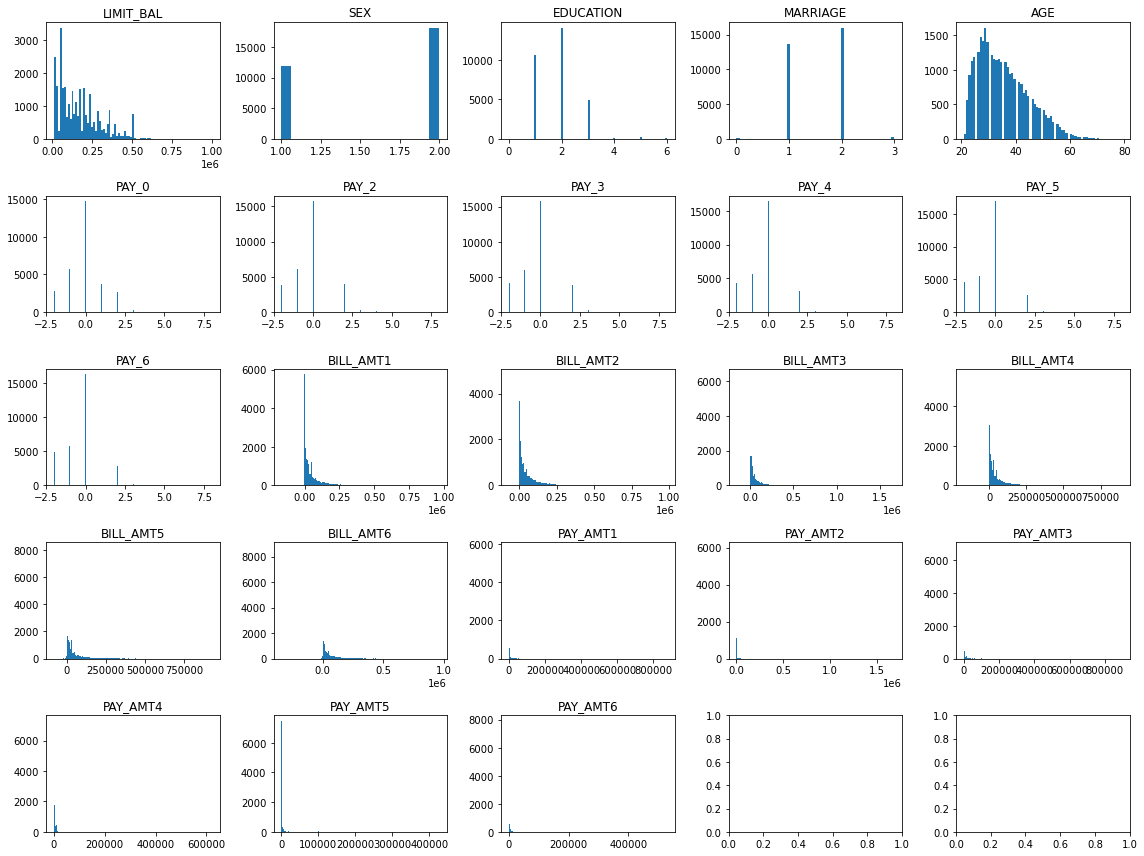

In [10]:
fig, axes = plt.subplots(5,5, figsize=(16,12))
for ax, c in zip(axes.flat, col):
    ax.hist(df[c], bins='auto')
    ax.set_title(c)
plt.tight_layout()

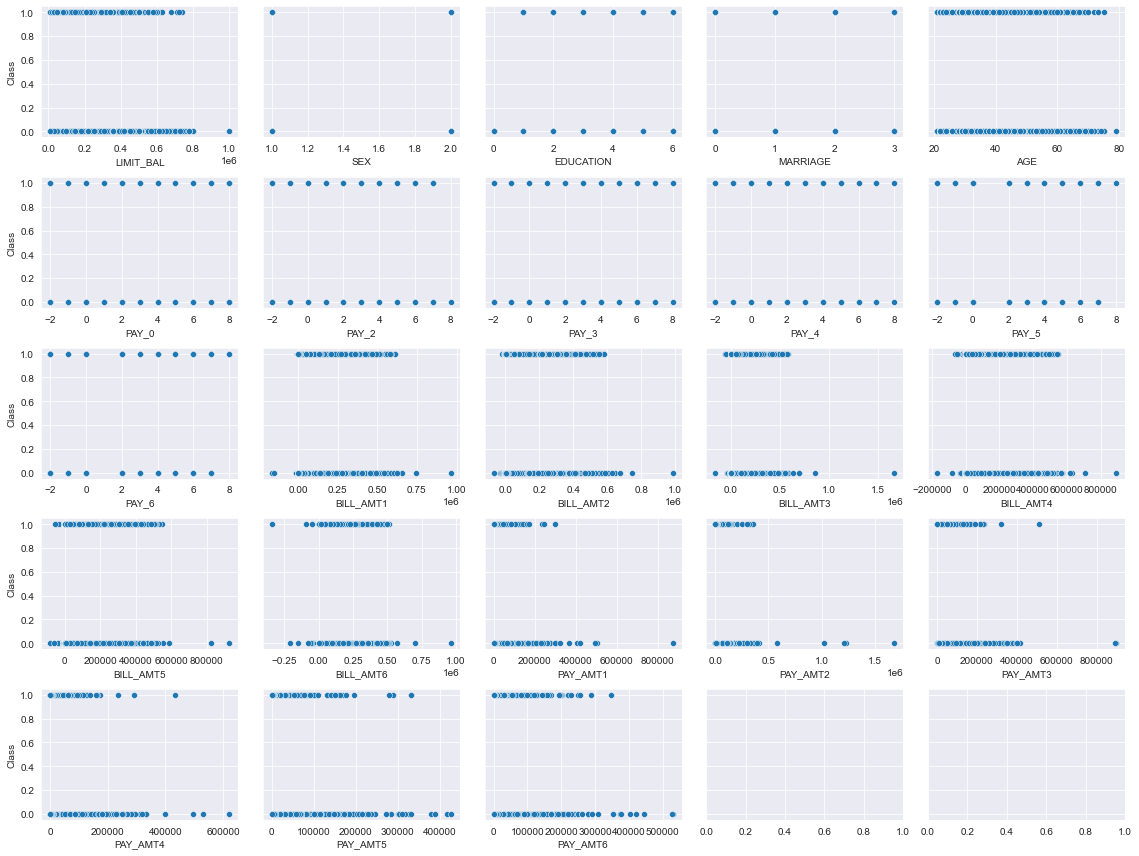

In [28]:
fig, axes = plt.subplots(5,5, sharey=True, figsize=(16,12))
for ax, c in zip(axes.flat, col):
    sns.scatterplot(data=df, x=c, y='Class', ax=ax)
plt.tight_layout()
#plt.savefig('images/overall.jpg')

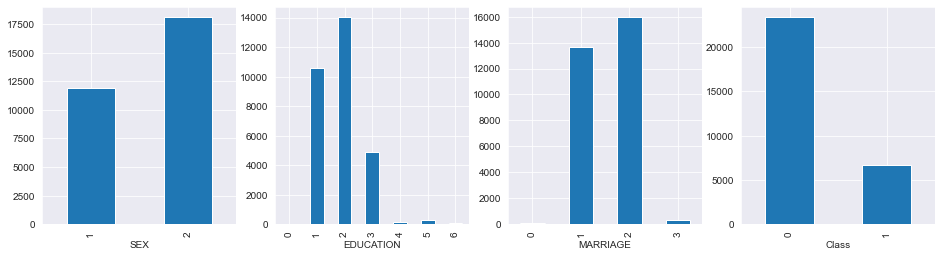

In [25]:
col = ['SEX', 'EDUCATION', 'MARRIAGE','Class']
fig, axes = plt.subplots(1,4, figsize=(16,4))
for ax, c in zip(axes.flat, col):
    df.groupby([c]).size().plot.bar(ax=ax)
#plt.savefig('images/groupby.jpg')

### Feature Engineering

#### Sex
one hot encoding

In [4]:
df.groupby(['SEX']).LIMIT_BAL.count().sort_values()

SEX
1    11888
2    18112
Name: LIMIT_BAL, dtype: int64

In [5]:
sex = pd.get_dummies(df['SEX'], prefix='sex', drop_first=True)

#### Education 
We can check what the count is for each group and get the dummies.

In [106]:
df.groupby(['EDUCATION']).LIMIT_BAL.count().sort_values()

EDUCATION
0       14
6       51
4      123
5      280
3     4917
1    10585
2    14030
Name: LIMIT_BAL, dtype: int64

<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

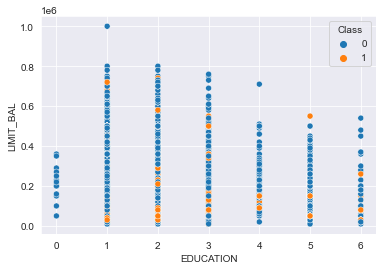

In [6]:
sns.scatterplot(data=df, x='EDUCATION', y='LIMIT_BAL', hue='Class')

In [7]:
# Categorize the education levels, compare all categories
education = pd.get_dummies(df['EDUCATION'], prefix='EDU', drop_first=True)

#### MARRIAGE
We do the same for marriage status, dummy the columns.

In [108]:
df.groupby(['MARRIAGE']).LIMIT_BAL.count().sort_values()

MARRIAGE
0       54
3      323
1    13659
2    15964
Name: LIMIT_BAL, dtype: int64

In [8]:
marriage = pd.get_dummies(df['MARRIAGE'], prefix='MAR', drop_first=True)

#### LIMIT_BAL
Statistical test

In [12]:
from scipy import stats

In [71]:
default = df[df['Class'] == 1]
not_default = df[df['Class'] == 0]

stats.ttest_ind(default.LIMIT_BAL, not_default.LIMIT_BAL, equal_var=False)

Ttest_indResult(statistic=-28.951587933509845, pvalue=3.3641002455114717e-178)

<AxesSubplot:xlabel='AGE', ylabel='LIMIT_BAL'>

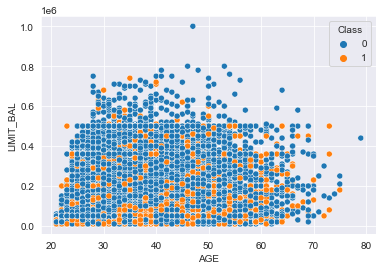

In [72]:
sns.scatterplot(data=df, x='AGE', y='LIMIT_BAL', hue='Class')

#### Bill & Payment

If in any given month the payment is on time, the month has a -1. Let's sum up all of the value accross the data frame as a measure of delinquency

In [10]:
pay = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [13]:
# sum the payments accross the columns
df['delinquency'] = df[pay].sum(axis=1)

# Statistical test
stats.ttest_ind(df[df['Class']==1].delinquency, df[df['Class']==0].delinquency, equal_var=False)

Ttest_indResult(statistic=41.14965018562675, pvalue=0.0)

<AxesSubplot:xlabel='delinquency', ylabel='Count'>

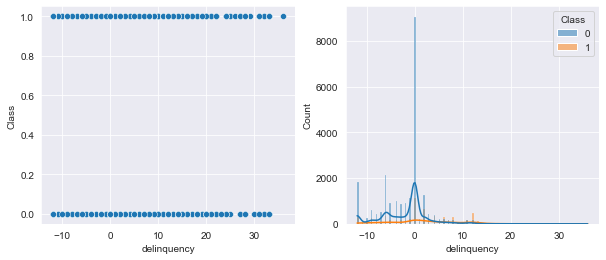

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.scatterplot(data=df, x='delinquency', y='Class', ax=ax[0])
sns.histplot(data=df, x='delinquency', hue='Class', kde=True, ax=ax[1])
#plt.savefig('images/deliquency.jpg')

In [14]:
bill = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
payment = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

df['bill'] = df[bill].sum(axis=1)
df['payment'] = df[payment].sum(axis=1)
df['balance'] = df.LIMIT_BAL-df['bill']+df['payment']

#Credit Utilization Rate
df['rate'] = df['bill']/df.LIMIT_BAL

# credit utility
df['utility'] = df['balance']/df.LIMIT_BAL

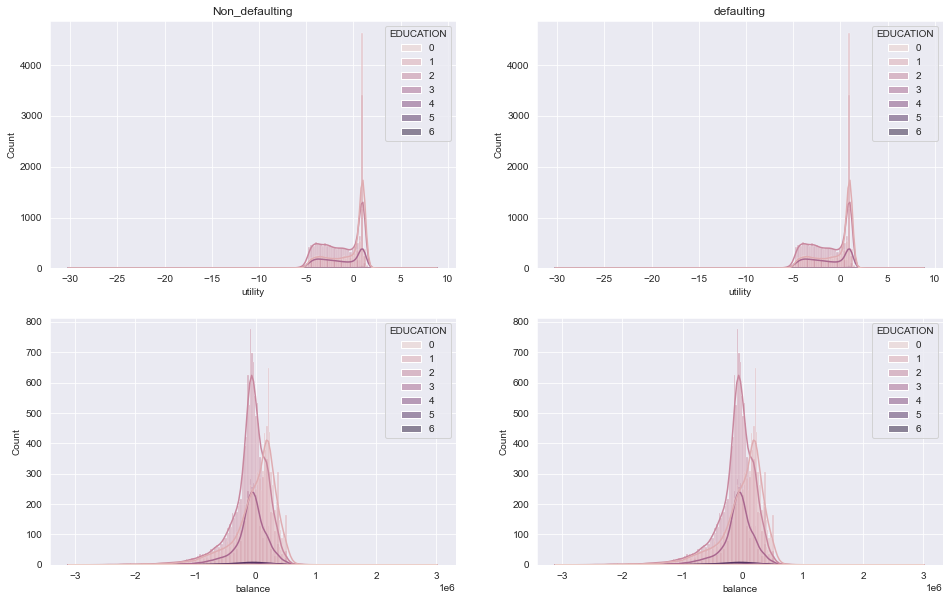

In [77]:
fig, ax = plt.subplots(2, 2, figsize=(16,10))
sns.color_palette("hls", 8)

ax[0][0].set_title('Non_defaulting')
sns.histplot(data=df['Class'] == 0, x=df['utility'], hue=df['EDUCATION'],kde=True, ax=ax[0][0])

ax[0][1].set_title('defaulting')
sns.histplot(data=df['Class'] == 1, x=df['utility'], hue=df['EDUCATION'],kde=True, ax=ax[0][1])

ax1.set_title('Non_defaulting')
sns.histplot(data=df[df['Class'] == 0], x=df['balance'], hue=df['EDUCATION'],kde=True, ax=ax[1][0])

ax2.set_title('defaulting')
sns.histplot(data=df[df['Class'] == 1], x=df['balance'], hue=df['EDUCATION'],kde=True, ax=ax[1][1])
#plt.savefig('images/utility.jpg')

#### Descriptive Statistics

In [87]:
col = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Class', 'delinquency', 'bill', 'payment', 'balance', 'rate', 'utility'] 

In [88]:
df[col].describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Class,delinquency,bill,payment,balance,rate,utility
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,0.221200,-1.094633,2.698617e+05,3.165139e+04,-7.072596e+04,2.238288,-1.004836
std,129747.661567,0.489129,0.790349,0.521970,9.217904,0.415062,5.893055,3.795643e+05,6.082768e+04,3.529022e+05,2.111340,2.046369
min,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,-12.000000,-3.362590e+05,0.000000e+00,-3.116080e+06,-1.395540,-30.221350
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,-5.000000,2.868800e+04,6.679750e+03,-1.926050e+05,0.179982,-2.823445
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,1.263110e+05,1.438300e+04,-2.809600e+04,1.709004,-0.421490
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,3.426265e+05,3.350350e+04,1.604378e+05,4.127575,0.971966
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,1.000000,36.000000,5.263883e+06,3.764066e+06,3.011514e+06,32.185850,8.857394


In [15]:
df = pd.concat([df, sex, education, marriage], axis=1)

## Modeling Fitting & Evaluation

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, auc, roc_curve

### Data Split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
col = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'delinquency', 'bill', 'payment', 'balance', 'rate', 'utility']
col_lr = ['LIMIT_BAL', 'AGE', 'delinquency', 'bill', 'payment', 'balance', 'rate', 'utility', 'sex_2', 'EDU_1', 'EDU_2', 'EDU_3', 'EDU_4', 'EDU_5', 
          'EDU_6', 'MAR_1', 'MAR_2',  'MAR_3']

In [19]:
X = df[col]
X_lr = df[col_lr]
y = df.Class

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y, test_size=0.2, random_state=34)

### SMOTE and ADASYN
imbalance data problem

In [92]:
from imblearn.over_sampling import SMOTE ADASYN

smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)
X_train_lr, y_train_lr = smote.fit_sample(X_train_lr, y_train_lr)

In [108]:
# adasyn = ADASYN()
# X_train, y_train = adasyn.fit_sample(X_train, y_train)

## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
pipe = Pipeline([('ss', StandardScaler()), ('lr', LogisticRegression())])
                 
param_grid = {'lr__fit_intercept': [True, False],    
              'lr__C': [1e16],
              'lr__solver': ['lbfgs','liblinear','saga']}

grid_lr = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)
grid_lr.fit(X_train_lr, y_train_lr)

train_pred_lr = grid_lr.predict(X_train_lr)
test_pred_lr = grid_lr.predict(X_test_lr)

In [49]:
# metric evaluation
train_accu_lr = accuracy_score(y_train_lr, train_pred_lr)
test_accu_lr = accuracy_score(y_test_lr, test_pred_lr)
print('Training accuracy score: {}'.format(train_accu_lr))
print('Test accuracy score: {}'.format(test_accu_lr))

train_f1_lr = f1_score(y_train_lr, train_pred_lr)
test_f1_lr = f1_score(y_test_lr, test_pred_lr)
print('Training F1 score: {}'.format(train_f1_lr))
print('Test F1 score: {}'.format(test_f1_lr))

y_score = grid_lr.decision_function(X_test_lr)
fpr_lr, tpr_lr, thresholds = roc_curve(y_test_lr, y_score)
print('AUC: {}'.format(auc(fpr_lr, tpr_lr)))
print('\n')
print(classification_report(y_test_lr, test_pred_lr))

Training accuracy score: 0.79875
Test accuracy score: 0.7976666666666666
Training F1 score: 0.26349496797804206
Test F1 score: 0.25338253382533826
AUC: 0.703895706732709


              precision    recall  f1-score   support

           0       0.81      0.98      0.88      4687
           1       0.66      0.16      0.25      1313

    accuracy                           0.80      6000
   macro avg       0.73      0.57      0.57      6000
weighted avg       0.77      0.80      0.75      6000



## K-Nearest Neighbors

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

train_pred_knn = knn.predict(X_train)
test_pred_knn = knn.predict(X_test)

In [54]:
pipe = Pipeline([('ss', StandardScaler()), ('knn', KNeighborsClassifier())])
                 
param_grid = {'knn__n_neighbors': [5, 10]}

grid_knn = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)
grid_knn.fit(X_train, y_train)

train_pred_knn = grid_knn.predict(X_train)
test_pred_knn = grid_knn.predict(X_test)

In [56]:
# metric evaluation
train_accu_knn = accuracy_score(y_train, train_pred_knn)
test_accu_knn = accuracy_score(y_test, test_pred_knn)
print('Training accuracy score: {}'.format(train_accu_knn))
print('Test accuracy score: {}'.format(test_accu_knn))

train_f1_knn = f1_score(y_train, train_pred_knn)
test_f1_knn = f1_score(y_test, test_pred_knn)
print('Training F1 score: {}'.format(train_f1_knn))
print('Test F1 score: {}'.format(test_f1_knn))

y_score = knn.decision_function(X_test_knn)
fpr_knn, tpr_knn, thresholds = roc_curve(y_test_knn, y_score)
print('AUC: {}'.format(auc(fpr_knn, tpr_knn)))
print('\n')
print(classification_report(y_test, test_pred_knn))



Training accuracy score: 0.814
Test accuracy score: 0.7975
Training F1 score: 0.38478500551267913
Test F1 score: 0.31856421761076836


AttributeError: 'KNeighborsClassifier' object has no attribute 'decision_function'

In [ ]:
y_score = lr.decision_function(X_test_lr)
fpr_lr, tpr_lr, thresholds = roc_curve(y_test_lr, y_score)

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [22]:
pipe = Pipeline([('ss', StandardScaler()), ('tree', DecisionTreeClassifier())])

param_grid = {'tree__criterion': ['gini', "entropy"],    
              'tree__max_depth': [None, 4, 8, 12],
              'tree__max_features': [3, 4, 7],
              'tree__min_samples_split': [2, 5, 10],
              'tree__min_samples_leaf': [1, 3, 6]}

grid_tree = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)
grid_tree.fit(X_train, y_train)

train_pred_tree = grid_tree.predict(X_train)
test_pred_tree = grid_tree.predict(X_test)

In [25]:
# metric evaluation
train_accu_tree = accuracy_score(y_train, train_pred_tree)
test_accu_tree = accuracy_score(y_test, test_pred_tree)
print('Training accuracy score: {}'.format(train_accu_tree))
print('Test accuracy score: {}'.format(test_accu_tree))

train_f1_tree = f1_score(y_train, train_pred_tree)
test_f1_tree = f1_score(y_test, test_pred_tree)
print('Training F1 score: {}'.format(train_f1_tree))
print('Test F1 score: {}'.format(test_f1_tree))

print(classification_report(y_test, test_pred_tree))

Training accuracy score: 0.8072083333333333
Test accuracy score: 0.8091666666666667
Training F1 score: 0.4130407205378663
Test F1 score: 0.42083965604451185
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4687
           1       0.63      0.32      0.42      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000



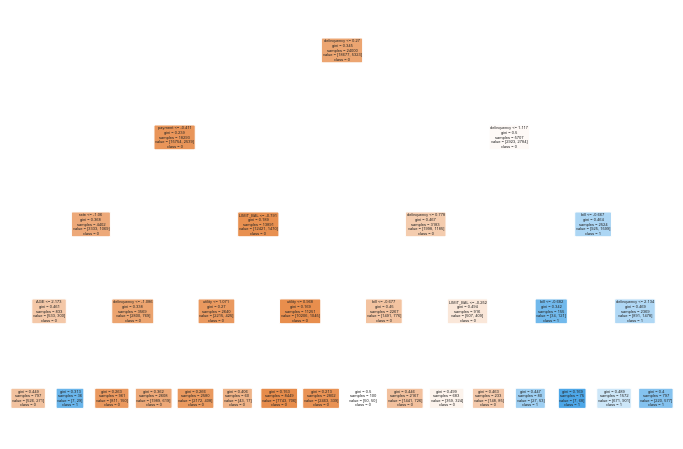

In [43]:
plt.figure(figsize=(12,8) ,dpi=200)
tree.plot_tree(grid_tree.best_estimator_[1],  
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
#plt.savefig('images/tree.jpg')
plt.show()

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
pipe = Pipeline([('ss', StandardScaler()), ('rf', RandomForestClassifier())])

param_grid = {'rf__n_estimators': [100],
              'rf__criterion': ['gini', "entropy"],    
              'rf__max_depth': [None, 4, 8, 12],
              'rf__max_features': [None, 3, 4, 7],
              'rf__min_samples_split': [2, 5, 10],
              'rf__min_samples_leaf': [1, 3, 6]}

grid_rf = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)
grid_rf.fit(X_train, y_train)

train_pred_rf = grid_rf.predict(X_train)
test_pred_rf = grid_rf.predict(X_test)

In [41]:
# metric evaluation
train_accu_rf = accuracy_score(y_train, train_pred_rf)
test_accu_rf = accuracy_score(y_test, test_pred_rf)
print('Training accuracy score: {}'.format(train_accu_rf))
print('Test accuracy score: {}'.format(test_accu_rf))

train_f1_rf = f1_score(y_train, train_pred_rf)
test_f1_rf = f1_score(y_test, test_pred_rf)
print('Training F1 score: {}'.format(train_f1_rf))
print('Test F1 score: {}'.format(test_f1_rf))

print(classification_report(y_test, test_pred_rf))

Training accuracy score: 0.8072083333333333
Test accuracy score: 0.8091666666666667
Training F1 score: 0.4130407205378663
Test F1 score: 0.42083965604451185
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4687
           1       0.63      0.32      0.42      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000



## SVM 

In [192]:
from sklearn.svm import SVC

In [105]:
svm = SVC()
svm.fit(X_train, y_train)

train_pred_svm = svm.predict(X_train)
test_pred_svm = svm.predict(X_test)

In [193]:
pipe = Pipeline([('ss', StandardScaler()), ('svm', SVC())])
                 
param_grid = {'svm__kernel': ['linear', 'polynomial', 'rbf','sigmoid'],
              'svm__C': [0.0001, 0.01, 0.1, 1]}

grid_svm = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)
grid_svm.fit(X_train, y_train)

train_pred_svm = grid_svm.predict(X_train)
test_pred_svm = grid_svm.predict(X_test)

In [194]:
# metric evaluation
train_accu_svm = accuracy_score(y_train, train_pred_svm)
test_accu_svm = accuracy_score(y_test, test_pred_svm)
print('Training accuracy score: {}'.format(train_accu_svm))
print('Test accuracy score: {}'.format(test_accu_svm))

train_f1_svm = f1_score(y_train, train_pred_svm)
test_f1_svm = f1_score(y_test, test_pred_svm)
print('Training F1 score: {}'.format(train_f1_svm))
print('Test F1 score: {}'.format(test_f1_svm))

print(classification_report(y_test, test_pred_svm))

Training accuracy score: 0.8032083333333333
Test accuracy score: 0.8041666666666667
Training F1 score: 0.3222844023532789
Test F1 score: 0.3227665706051874
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4687
           1       0.66      0.21      0.32      1313

    accuracy                           0.80      6000
   macro avg       0.74      0.59      0.60      6000
weighted avg       0.78      0.80      0.76      6000



## XGBoost

In [195]:
from xgboost import XGBClassifier

In [197]:
pipe = Pipeline([('ss', StandardScaler()), ('xgb', XGBClassifier())])

param_grid = {'xgb__n_estimators': [100],
              'xgb__criterion': ['gini', "entropy"],    
              'xgb__max_depth': [None, 4, 8, 12],
              'xgb__max_features': [None, 3, 4, 7],
              'xgb__min_samples_split': [2, 5, 10],
              'xgb__min_samples_leaf': [1, 3, 6],              
#               'xgb__learning_rate': [0.2],
#               'xgb__min_child_weight': [1, 2],
#               'xgb__subsample': [0.5]
             }

grid_xgb = GridSearchCV(estimator=pipe, param_grid=param_grid, n_jobs=-1)
grid_xgb.fit(X_train, y_train)

train_pred_xgb = grid_xgb.predict(X_train)
test_pred_xgb = grid_xgb.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:  2.5min


KeyboardInterrupt: 

In [ ]:
# metric evaluation
train_accu_xgb = accuracy_score(y_train, train_pred_xgb)
test_accu_xgb = accuracy_score(y_test, test_pred_xgb)
print('Training accuracy score: {}'.format(train_accu_xgb))
print('Test accuracy score: {}'.format(test_accu_xgb))

train_f1_svm = f1_score(y_train, train_pred_xgb)
test_f1_svm = f1_score(y_test, test_pred_xgb)
print('Training F1 score: {}'.format(train_f1_xgb))
print('Test F1 score: {}'.format(test_f1_xgb))

print(classification_report(y_test, test_pred_xgb))

In [ ]:
plt.plot(fpr, tpr, lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], c='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend()

In [48]:
confusion_matrix(y_test, test_pred_lr)

array([[5855,    1],
       [1644,    0]])

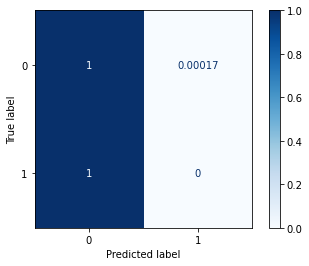

In [56]:
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, normalize='true')                              

# Conclusion